<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
Is someone likely to donate more than once?
After a long donation break, is a donor likely to donate again?

## Actual Question
Has someone donated blood since March 2007?

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
file = open('C:/Users/carls/OneDrive/Desktop/IOD/Data/transfusion.data')
file.read()
file.close()

In [3]:
data = pd.read_csv('C:/Users/carls/OneDrive/Desktop/IOD/Data/transfusion.data', sep =',')
data.head()

Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0

In [4]:
data.columns = ['recency', 'frequency', 'monetary', 'time', 'donated_mar2007']
data.head()

recency  frequency  monetary  time  donated_mar2007
0        2         50     12500    98                1
1        0         13      3250    28                1
2        1         16      4000    35                1
3        2         20      5000    45                1
4        1         24      6000    77                0

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [5]:
print('data shape = ', data.shape)
print()
print(data.dtypes)
print()
print(data.info())
print()
print('data isnulll = ', data.isnull().sum())


data shape =  (748, 5)

recency            int64
frequency          int64
monetary           int64
time               int64
donated_mar2007    int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   recency          748 non-null    int64
 1   frequency        748 non-null    int64
 2   monetary         748 non-null    int64
 3   time             748 non-null    int64
 4   donated_mar2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None

data isnulll =  recency            0
frequency          0
monetary           0
time               0
donated_mar2007    0
dtype: int64


In [6]:
data.describe().T

count         mean          std    min     25%     50%  \
recency          748.0     9.506684     8.095396    0.0    2.75     7.0   
frequency        748.0     5.514706     5.839307    1.0    2.00     4.0   
monetary         748.0  1378.676471  1459.826781  250.0  500.00  1000.0   
time             748.0    34.282086    24.376714    2.0   16.00    28.0   
donated_mar2007  748.0     0.237968     0.426124    0.0    0.00     0.0   

                    75%      max  
recency            14.0     74.0  
frequency           7.0     50.0  
monetary         1750.0  12500.0  
time               50.0     98.0  
donated_mar2007     0.0      1.0

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

<AxesSubplot:>

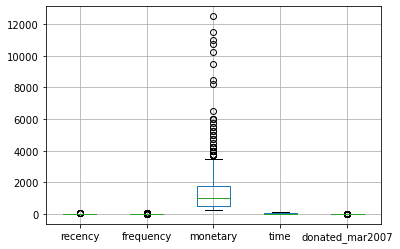

In [7]:
data.boxplot()

<AxesSubplot:>

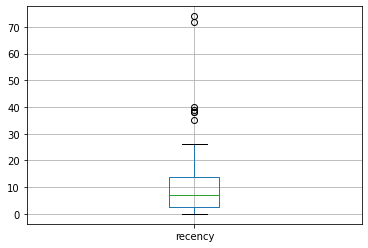

In [8]:
data.boxplot('recency')

<AxesSubplot:>

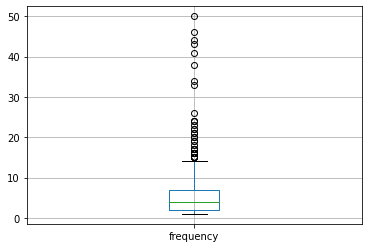

In [9]:
data.boxplot('frequency')

<AxesSubplot:>

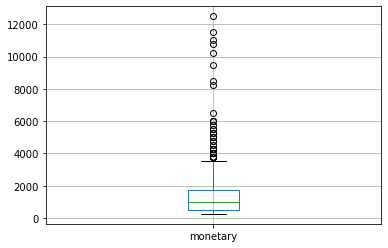

In [10]:
data.boxplot('monetary')

<AxesSubplot:>

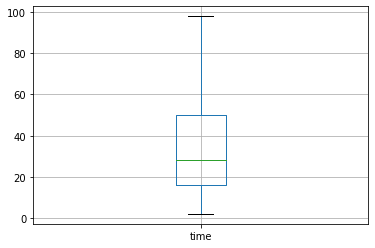

In [11]:
data.boxplot('time')

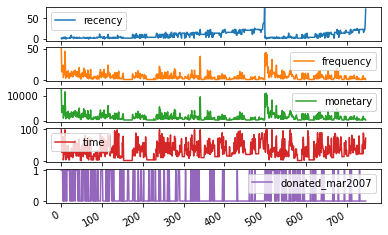

In [12]:
#Outliers (remove or adjust if possible or necessary)

data.plot(subplots=True)

plt.show()

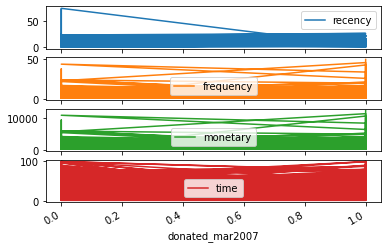

In [13]:
data.plot(x='donated_mar2007',subplots=True)

plt.show()

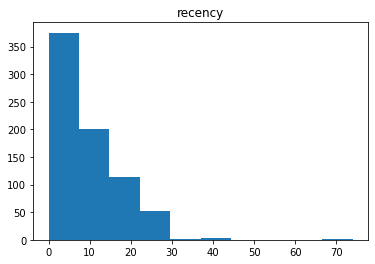

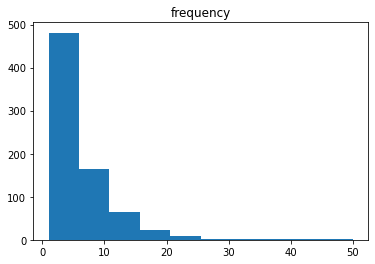

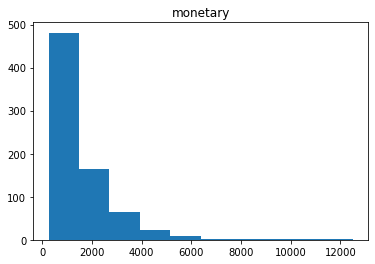

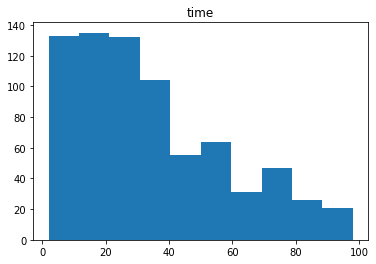

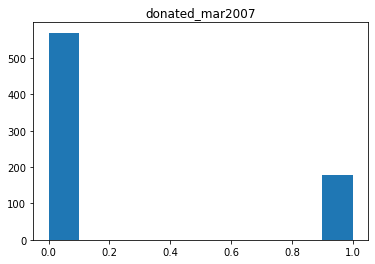

In [14]:
for i in data.columns:
    plt.figure()
    plt.hist(data[i])
    
    plt.title(label=i)

In [15]:
#Null (remove or interpolate if possible or necessary)
data.isnull().sum()

recency            0
frequency          0
monetary           0
time               0
donated_mar2007    0
dtype: int64

In [16]:
#Coded content (transform if possible or necessary [str to number or vice-versa])
data.dtypes

recency            int64
frequency          int64
monetary           int64
time               int64
donated_mar2007    int64
dtype: object

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [17]:
y = data.donated_mar2007

In [18]:
predictor_info = [col for col in data.columns if col!= 'donated_mar2007']
X = pd.DataFrame(data, columns = predictor_info)

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [19]:
test_size = X.shape[0] - 500

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 50, stratify = y)

In [20]:
X_train.shape

(500, 4)

In [21]:
y_train.shape

(500,)

In [22]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [23]:
model = DecisionTreeClassifier()
print(model)

DecisionTreeClassifier()


# Step 9: Fit the Model

In [24]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

Accuracy is:  0.948
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       381
           1       1.00      0.78      0.88       119

    accuracy                           0.95       500
   macro avg       0.97      0.89      0.92       500
weighted avg       0.95      0.95      0.95       500



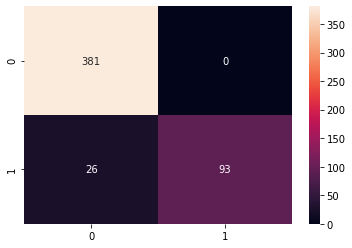

In [25]:
model.score(X_train, y_train)

yhat = model.predict(X_train)

ac = accuracy_score(y_train, yhat)

print('Accuracy is: ', ac)

y_pp = model.predict_proba(X_train)

cm = confusion_matrix(y_train, yhat)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report (y_train, yhat))

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

Accuracy is:  0.6935483870967742
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       189
           1       0.33      0.29      0.31        59

    accuracy                           0.69       248
   macro avg       0.56      0.55      0.56       248
weighted avg       0.68      0.69      0.69       248



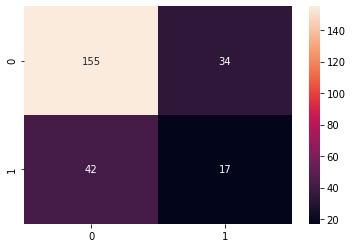

In [30]:
model.score(X_test, y_test)

yhat1 = model.predict(X_test)

ac1 = accuracy_score(y_test, yhat1)

print('Accuracy is: ', ac)

y_pp1 = model.predict_proba(X_test)

cm = confusion_matrix(y_test, yhat1)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report (y_test, yhat1))

In [32]:
y_pp = model.predict_proba(X_train)
y_pp1 = model.predict_proba(X_test)

In [33]:
fpr, tpr, _ = roc_curve(y_train, y_pp[:,1])
fpr1, tpr1, _ = roc_curve(y_test, y_pp1[:,1])

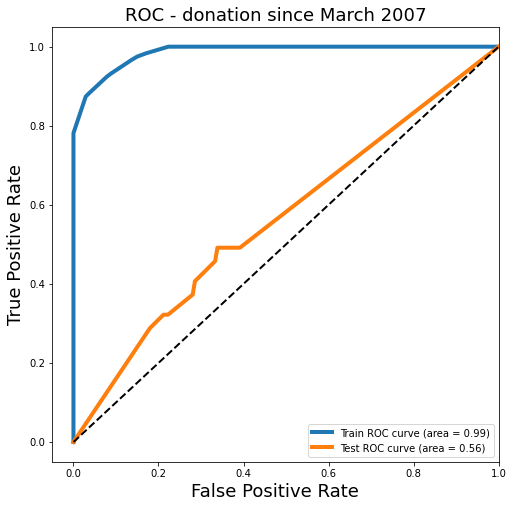

In [34]:
plt.figure(figsize=[8,8])

plt.plot(fpr, tpr, label='Train ROC curve (area = %0.2f)' % auc(fpr, tpr), linewidth=4)
plt.plot(fpr1, tpr1, label='Test ROC curve (area = %0.2f)' % auc(fpr1, tpr1), linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC - donation since March 2007', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > Â© 2021 Institute of Data


---



---



